In [37]:
import numpy as np
import mediapipe
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

In [2]:
%%time
# %%notify

dict_list = []
for entry in os.scandir("./lightwheel_pose_data"):
    if os.path.isfile(entry):
        dict_list.append([entry.name[:-4],np.load(entry.path, allow_pickle=True).item()])

Wall time: 59.6 s


In [8]:
# calculate the mean point for every frame
def meanor(landmark_dict):
    x_list = []
    y_list = []
    for value in landmark_dict.values():
        x = value.x
        y = value.y
        x_list.append(x)
        y_list.append(y)
        
    xm = np.mean(x_list)
    ym = np.mean(y_list)
    return [x,y]

In [9]:
# stack all cordinates in a list

def cord_extractor(case_data):
    x_list = []
    y_list = []
    
    for value in case_data.values():
        if value == 0:
            continue
        else:
            x = abs(round(meanor(value)[0] * 640))
            y = abs(round(meanor(value)[1] * 480))
            x_list.append(x)
            y_list.append(y)
            
    y_list = [2*(240-temp) + temp for temp in y_list]
    
    return(x_list, y_list)

In [45]:
# +----+----+----+----+
# | 12 | 13 | 14 | 15 |
# +----+----+----+----+
# |  8 |  9 | 10 | 11 |
# +----+----+----+----+
# |  4 |  5 |  6 |  7 |
# +----+----+----+----+
# |  0 |  1 |  2 |  3 |
# +----+----+----+----+


def point_cat(x,y):
    if x <= 640/4 and x >= 0 and y >= 0 and y <= 480/4:
        return 0
    elif x > 640/4 and x <= 640/2 and y <= 480/4 and y >= 0:
        return 1
    elif x > 640/2 and x <= 3*640/4 and y <= 480/4 and y >= 0:
        return 2
    elif x > 3*640/4 and x <= 640 and y <= 480/4 and y >= 0:
        return 3
    
    if x <= 640/4 and x >= 0 and y > 480/4 and y <= 480/2:
        return 4
    elif x > 640/4 and x <= 640/2 and y > 480/4 and y <= 480/2:
        return 5
    elif x > 640/2 and x <= 3*640/4 and y > 480/4 and y <= 480/2:
        return 6
    elif x > 3*640/4 and x <= 640 and y > 480/4 and y <= 480/2:
        return 7
    
    if x <= 640/4 and x >= 0 and y > 480/2 and y <= 3*480/4:
        return 8
    elif x > 640/4 and x <= 640/2 and y > 480/2 and y <= 3*480/4:
        return 9
    elif x > 640/2 and x <= 3*640/4 and y > 480/2 and y <= 3*480/4:
        return 10
    elif x > 3*640/4 and x <= 640 and y > 480/2 and y <= 3*480/4:
        return 11
    
    if x <= 640/4 and x >= 0 and y > 3*480/4 and y <= 480 and y >= 0:
        return 12
    elif x > 640/4 and x <= 640/2 and y > 3*480/4 and y <= 480 and y >= 0:
        return 13
    elif x > 640/2 and x <= 3*640/4 and y > 3*480/4 and y <= 480 and y >= 0:
        return 14
    elif x > 3*640/4 and x <= 640 and y > 3*480/4 and y <= 480 and y >= 0:
        return 15
    
    else:
        return -1

In [46]:
def list_cat(a, b):
    output = np.zeros(16)
    if len(a) == len(b):
        for i in range(len(a)):
            if i == 0:
                output[point_cat(a[i], b[i])] += 1
            else:
                if point_cat(a[i-1], b[i-1]) != point_cat(a[i], b[i]):
                    output[point_cat(a[i], b[i])] += 1
                else:
                    output[point_cat(a[i], b[i])] += 0
            
    else:
        return 0
    
    return output

47


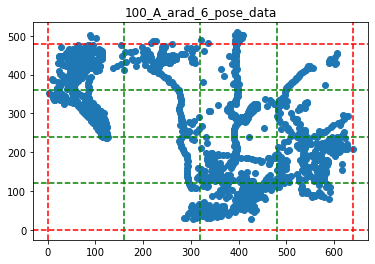

1777


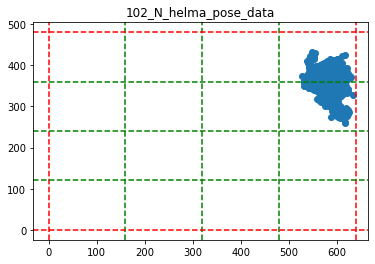

1370


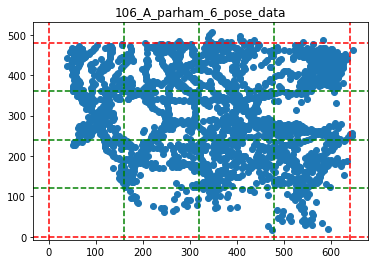

93


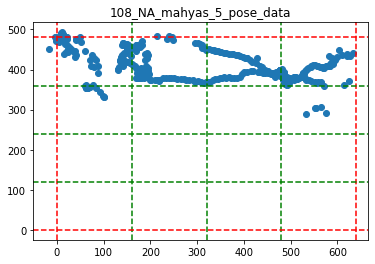

346


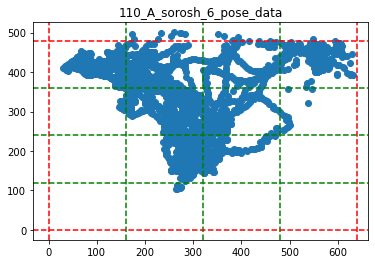

87


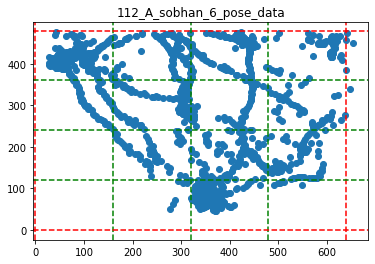

1226


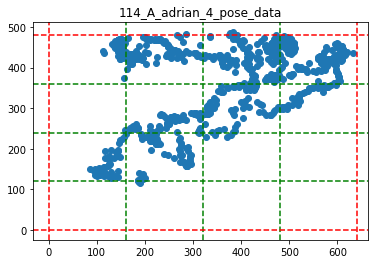

41


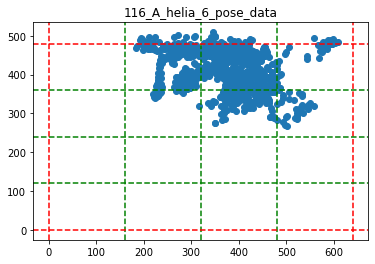

673


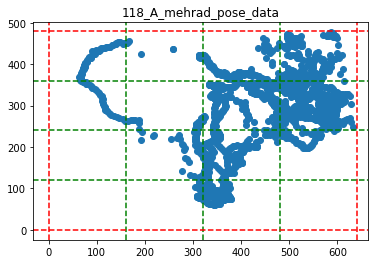

1124


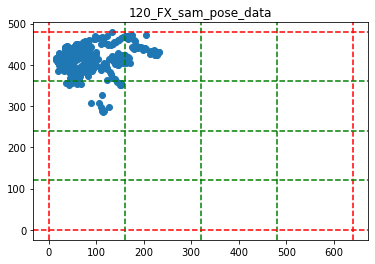

1046


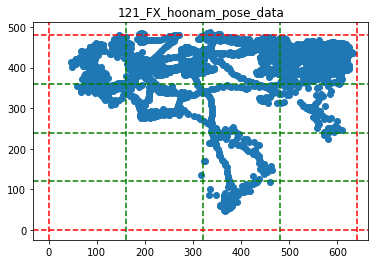

4718


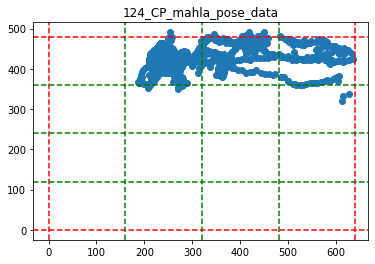

33


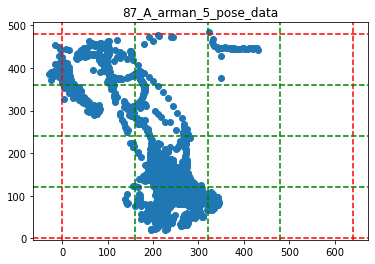

113


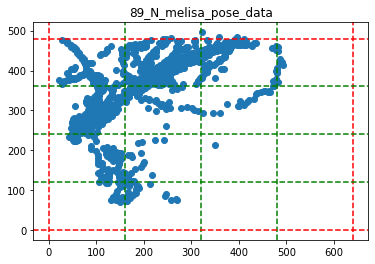

0


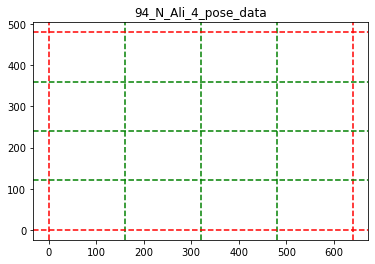

285


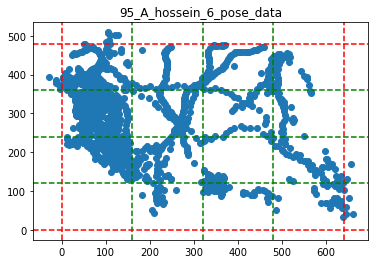

In [82]:
f_matrix = []
table = []

for data in dict_list:
    uid = data[0]
    pose_dicts = data[1]
    
    flag = 1
    sf = 0

    x_list = []
    y_list = []
    for value in pose_dicts.values():
#         print(value)
        if value == 0:
            continue
        else:
            X = round(value["nose"].x * 640)
            Y = round(value["nose"].y * 480)
            x_list.append(X)
            y_list.append(Y)
            stat = point_cat(X,Y)
            if flag == 1:
                pre_stat = stat
                flag = 0
            if stat == pre_stat and stat != -1:
                pre_stat = stat
                sf += 1
                
            
    y_list = [2*(240-temp) + temp for temp in y_list]
    print(sf)
#     temp_list = []
#     for i in range(len(x_list)):
#         temp_list.append(point_cat(x_list[i],y_list[i]))
    
#     f_matrix.append([uid,temp_list])
    
#     x1 = np.percentile(x_list,25)
#     x2 = np.percentile(x_list,75)
#     y1 = np.percentile(y_list,25)
#     y2 = np.percentile(y_list,75)
    
#     rect=mpatches.Rectangle((x1,y1),x2-x1,y2-y1, 
#                         fill = False,
#                         color = "purple",
#                         linewidth = 3)
    
#     plt.gca().add_patch(rect)
    
    plt.title(uid)
    plt.scatter(x_list, y_list)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.axvline(x=640 / 4, color='g', linestyle='--')
    plt.axvline(x=2 *  640 / 4, color='g', linestyle='--')
    plt.axvline(x=3 * 640 / 4, color='g', linestyle='--')
    plt.axvline(x=640, color='r', linestyle='--')
    
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axhline(y=480/4, color='g', linestyle='--')
    plt.axhline(y=2 * 480/4, color='g', linestyle='--')
    plt.axhline(y=3 * 480/4, color='g', linestyle='--')
    plt.axhline(y=480, color='r', linestyle='--')
    plt.show()

In [60]:
ttt = [ff for ff in f_matrix[0][1] if ff != -1]
print(ttt)

[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [72]:
import seaborn

<ipython-input-79-77d62895f538>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, matrix)


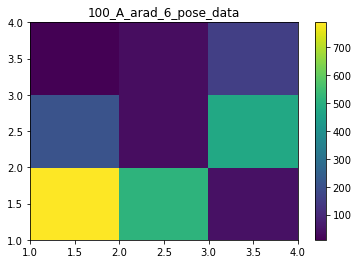

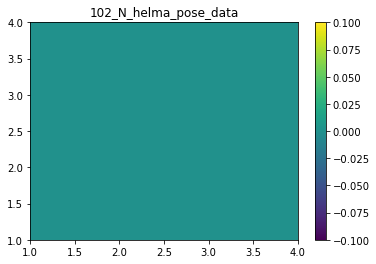

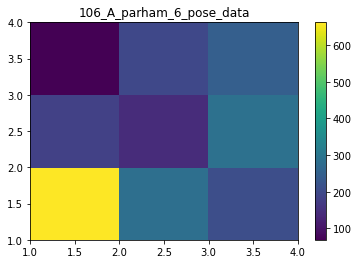

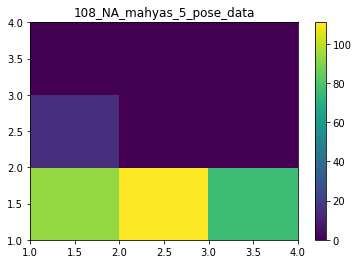

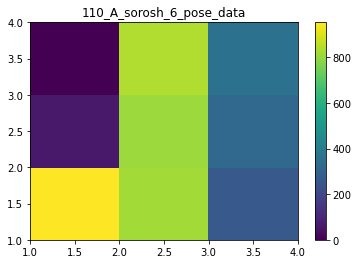

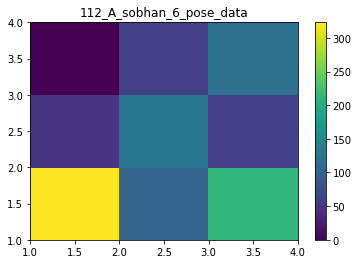

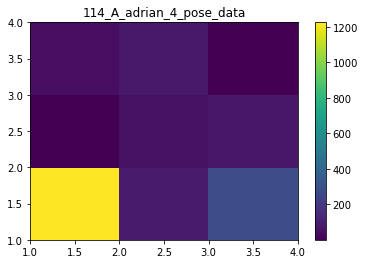

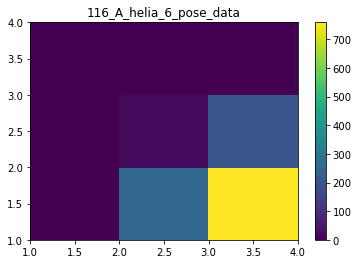

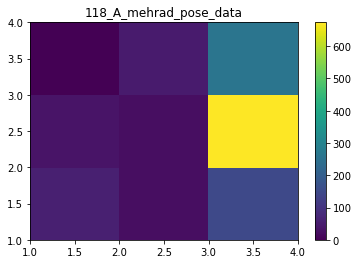

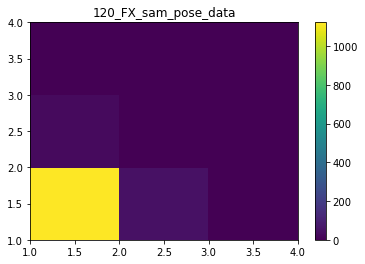

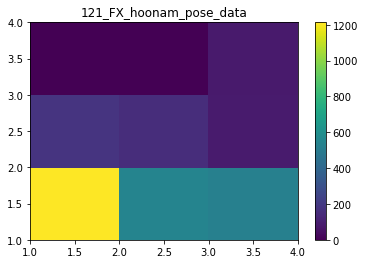

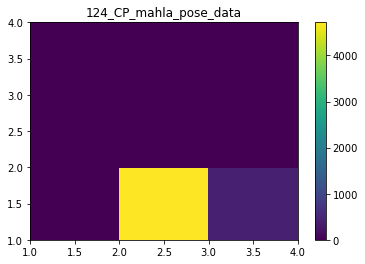

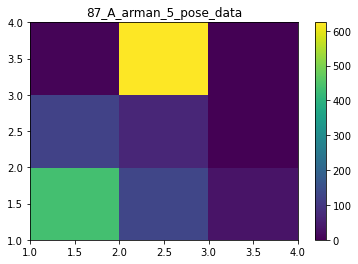

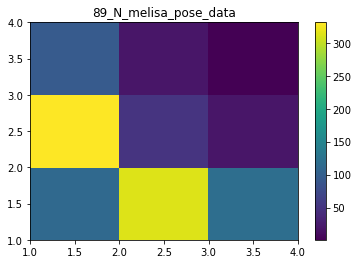

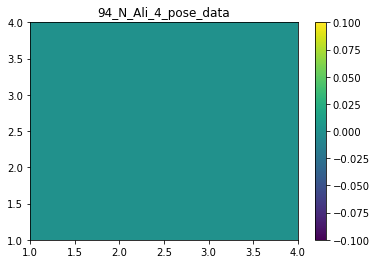

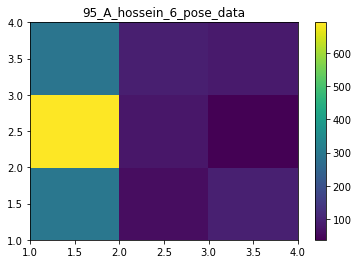

In [79]:
for data in f_matrix:
    uid = data[0]
    points = data[1]
    
    matrix = np.zeros(16)
    for id in points:
        if id != -1:
            matrix[id] += 1
            
#     print(uid, matrix)
    
#     x_bar = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#     plt.bar(x_bar, matrix, color ='red',width = 0.8)
#     plt.xlabel("grid number")
#     plt.ylabel("No. of points")
#     plt.title(uid)
#     plt.show()

    matrix = np.reshape(matrix, (4,4))
    matrix = np.flip(matrix, 0)
    x = np.arange(1, 5)
    y = np.arange(1, 5)
    
    fig, ax = plt.subplots()
    ax.set_title(uid)
    c = ax.pcolormesh(x, y, matrix)
    plt.colorbar(c)
    plt.show()

In [73]:
np.random.rand(6, 10)

array([[0.60085056, 0.27774263, 0.08224737, 0.54942404, 0.49556341,
        0.04004085, 0.85799175, 0.30227913, 0.73796315, 0.33404486],
       [0.78487711, 0.09991322, 0.50082856, 0.86689136, 0.04641099,
        0.05150789, 0.68654659, 0.66540309, 0.60760236, 0.84902774],
       [0.77392125, 0.83365636, 0.94775087, 0.74535051, 0.88795843,
        0.29344066, 0.89767753, 0.91243386, 0.18847628, 0.31018009],
       [0.32510623, 0.11900871, 0.25771214, 0.49527719, 0.13665312,
        0.59026205, 0.68983337, 0.89036307, 0.19759849, 0.20528635],
       [0.88913891, 0.892352  , 0.25475618, 0.25901658, 0.83205772,
        0.73044072, 0.00889944, 0.70132783, 0.54746339, 0.50167518],
       [0.46083112, 0.9078272 , 0.60088029, 0.72543912, 0.83374303,
        0.05632531, 0.91870561, 0.04753056, 0.36201125, 0.61385424]])

In [69]:
# +----+----+----+----+
# | 12 | 13 | 14 | 15 |
# +----+----+----+----+
# |  8 |  9 | 10 | 11 |
# +----+----+----+----+
# |  4 |  5 |  6 |  7 |
# +----+----+----+----+
# |  0 |  1 |  2 |  3 |
# +----+----+----+----+


foobar = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tt = np.reshape(foobar, (4,4))
tt = np.flip(tt, 0)
tt

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [6]:
def classer(input_dict):
    
    p1x = np.mean([input_dict['right_eye_inner'].x,
                   input_dict['right_eye'].x,
                   input_dict['right_eye_outer'].x,
                   input_dict['right_ear'].x])
    
    p1y = np.mean([input_dict['right_eye_inner'].y,
                   input_dict['right_eye'].y,
                   input_dict['right_eye_outer'].y,
                   input_dict['right_ear'].y])
    
    p1vis = np.mean([input_dict['right_eye_inner'].visibility,
                   input_dict['right_eye'].visibility,
                   input_dict['right_eye_outer'].visibility,
                   input_dict['right_ear'].visibility])
    
    
    p2x = np.mean([input_dict['left_eye_inner'].x,
                   input_dict['left_eye'].x,
                   input_dict['left_eye_outer'].x,
                   input_dict['left_ear'].x])
    
    p2y = np.mean([input_dict['left_eye_inner'].y,
                   input_dict['left_eye'].y,
                   input_dict['left_eye_outer'].y,
                   input_dict['left_ear'].y])
    
    p2vis = np.mean([input_dict['left_eye_inner'].visibility,
                   input_dict['left_eye'].visibility,
                   input_dict['left_eye_outer'].visibility,
                   input_dict['left_ear'].visibility])
    
    
    p3x = np.mean([input_dict['nose'].x,
                   input_dict['mouth_left'].x,
                   input_dict['mouth_right'].x])
    
    p3y = np.mean([input_dict['nose'].y,
                   input_dict['mouth_left'].y,
                   input_dict['mouth_right'].y])
    
    p3vis = np.mean([input_dict['nose'].visibility,
                   input_dict['mouth_left'].visibility,
                   input_dict['mouth_right'].visibility])
    
    
    
    return [[p1x, p1y, p1vis],
            [p2x, p2y, p2vis],
            [p3x, p3y, p3vis]
           ]

In [70]:
def detection(pose_dict):

    non_detected = 0
    detected = 0
    area_vals = []

    width = 640
    height = 480

    for value in pose_dict.values():
        if value == 0:
            non_detected += 1
            area_vals.append(0)
        else:
            [p1x, p1y, p1vis], [p2x, p2y, p2vis], [p3x, p3y, p3vis] = classer(value)

            p1x = round(p1x * width)
            p1y = round(p1y * height)

            p2x = round(p2x * width)
            p2y = round(p2y * height)

            p3x = round(p3x * width)
            p3y = round(p3y * height)

            pxmean = np.mean([p1x, p2x, p3x])
            pymean = np.mean([p1y, p2y, p3y])
            vismean = np.mean([p1vis, p2vis, p3vis])

            area = np.pi * round(math.dist([pxmean, pymean],[p3x, p3y])) ** 2
            area_vals.append(area)

            if area >= 100:
                detected += 1
            else:
                non_detected += 1
                
    return [detected, non_detected, area_vals]

100_A_arad_6_pose_data    0.5329301075268817


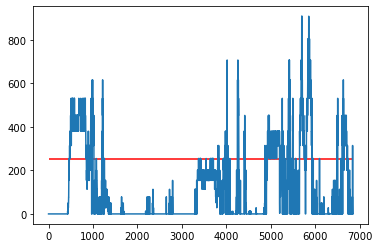

102_N_helma_pose_data    0.10810810810810811


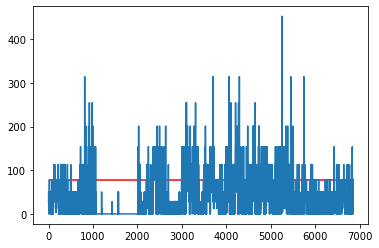

106_A_parham_6_pose_data    0.5140393544107893


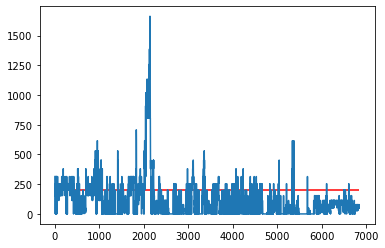

108_NA_mahyas_5_pose_data    0.01890162226521804


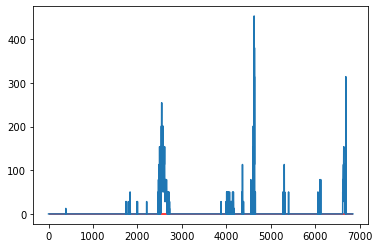

110_A_sorosh_6_pose_data    0.9462762933484935


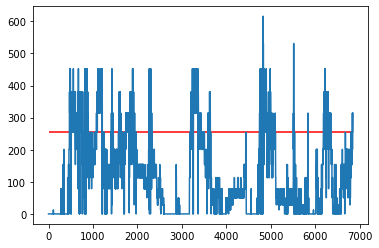

112_A_sobhan_6_pose_data    0.1029940119760479


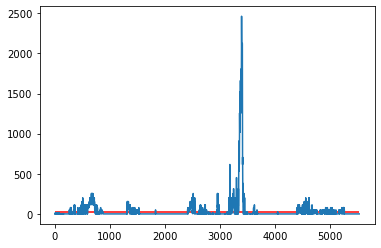

114_A_adrian_4_pose_data    0.08372902817347262


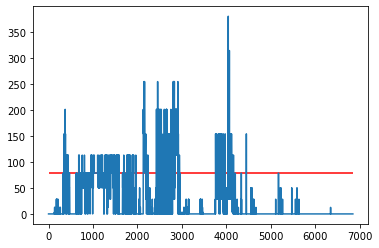

116_A_helia_6_pose_data    0.026028421839940166


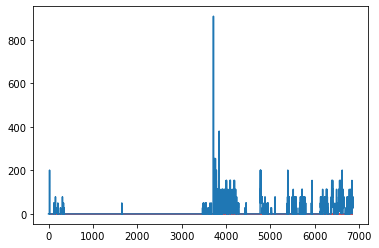

118_A_mehrad_pose_data    0.13884270036581312


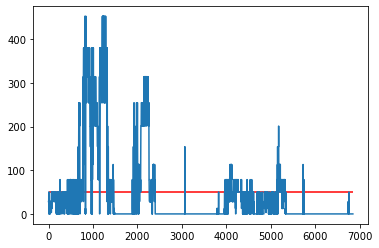

120_FX_sam_pose_data    0.0930053804765565


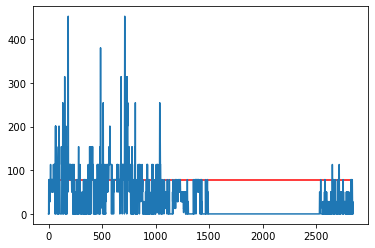

121_FX_hoonam_pose_data    0.09451718494271685


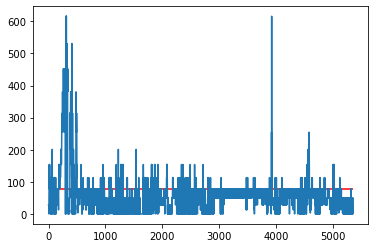

124_CP_mahla_pose_data    0.18375108038029386


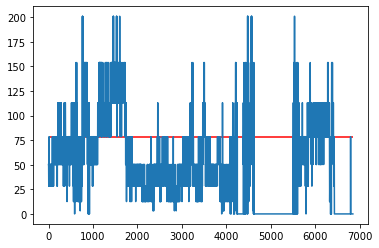

87_A_arman_5_pose_data    0.5800668489820723


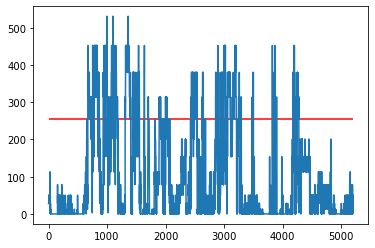

89_N_melisa_pose_data    0.03240880313536328


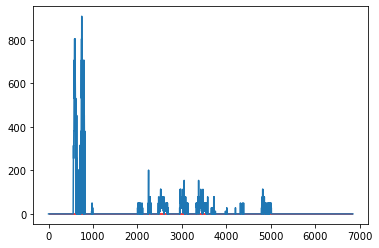

94_N_Ali_4_pose_data    0.0


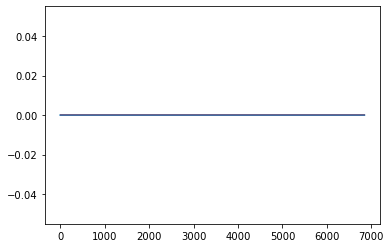

95_A_hossein_6_pose_data    0.25173547679941544


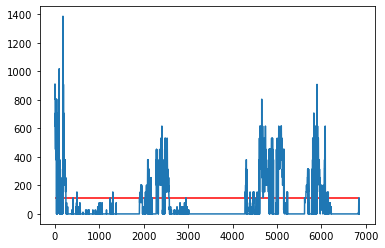

In [81]:
for data in dict_list:
    uid = data[0]
    pose_dicts = data[1]
    
    detected, non_detected, area_vals = detection(pose_dicts)
    print(uid,"  ",detected / non_detected)
    plt.plot(area_vals)
    plt.hlines(np.percentile(area_vals,80), 0, detected+non_detected, colors='red')
    plt.show()

In [27]:
def color_picker(vis_val):
    if vis_val >= 0 and vis_val < 0.33:
        return [0, 0, 255]
    elif vis_val >= 0.33 and vis_val < 0.66:
        return [0, 255, 0]
    elif vis_val >= 0.66 and vis_val <= 1:
        return [255, 0, 0]
    else:
        return [0, 0, 0]

In [61]:
import cv2

dir = "C:\\Users\\BMH\\Desktop\\TSS\\test_data\\87_A_arman_5\start_wheel_cam2.avi"
cap = cv2.VideoCapture(dir)
success, image = cap.read()
if cap.isOpened():
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out_dir = "87_A_arman"+".mp4"
writer = cv2.VideoWriter(out_dir, fourcc, fps, (width, height))

In [62]:
%%time

import math

frame_num = 0
data_dict = dict_list[12][1]
while cap.isOpened():
    success, image = cap.read()
    if not success:
        break
    frame_num += 1
#     print("%d out of %d" %(frame_num, int(length)))
    if data_dict[frame_num] == 0:
        writer.write(image)
    else:
        [p1x, p1y, p1vis], [p2x, p2y, p2vis], [p3x, p3y, p3vis] = classer(data_dict[frame_num])
        p1x = round(p1x * width)
        p1y = round(p1y * height)
        p1color = color_picker(p1vis)
        
        p2x = round(p2x * width)
        p2y = round(p2y * height)
        p2color = color_picker(p2vis)
        
        p3x = round(p3x * width)
        p3y = round(p3y * height)
        p3color = color_picker(p3vis)
        
        img = image
        img = cv2.circle(img, (p1x, p1y), 3, p1color, -1)
        img = cv2.circle(img, (p2x, p2y), 3, p2color, -1)
        img = cv2.circle(img, (p3x, p3y), 3, p3color, -1)
        
        pxmean = round(np.mean([p1x, p2x, p3x]))
        pymean = round(np.mean([p1y, p2y, p3y]))
        viscolor = color_picker(np.mean([p1vis, p2vis, p3vis]))
        img = cv2.rectangle(img,(pxmean - 3,pymean + 3),(pxmean + 3,pymean - 3),(0,255,0),-1)
        
        img = cv2.circle(img, (pxmean, pymean), round(math.dist([pxmean, pymean],[p3x, p3y])), [0,0,0], 2)
        s = np.pi * round(math.dist([pxmean, pymean],[p3x, p3y])) ** 2
        img = cv2.putText(image, str(s), (0,480), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        
        writer.write(img)
        
cap.release()
writer.release() 

Wall time: 29.6 s


In [69]:
detected / non_detected

0.5800668489820723

In [56]:
def surfacer(x1,y1,x2,y2,x3,y3):
    l2 = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    l1 = sqrt( (x2 - x3)**2 + (y2 - y3)**2 )
    area = (l2 * sqrt(l1 **2 - l2**2 /4))/2
    return area

In [41]:
img = cv2.imread("C:\\Users\\BMH\\Desktop\\CASS_data\\test_frames\\87_0.jpg")
img = cv2.circle(img, (round(img.shape[1]/2) + 200,round(img.shape[0]/2)), 3, [0, 255, 0], -1)
img = cv2.circle(img, (round(img.shape[1]/2),round(img.shape[0]/2)), 50, [0, 0, 0], -1)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),-1)
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow("img",img)

while(True):
    k = cv2.waitKey(33)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyWindow('img')